In [1]:
import os
import numpy as np
import pandas as pd
from itertools import cycle
import matplotlib.pyplot as plt
import sklearn
from sklearn.metrics import roc_auc_score, roc_curve, auc, f1_score, fbeta_score, accuracy_score
from sklearn.metrics import confusion_matrix
import ast



def clinic_sign(x, y, y_ask):
    import numpy as np
#     print(x)
#     print(y)
    
    x_ask = []
    
    for i in np.arange(min(x), max(x), 0.01):
        print(np.min(x), np.max(x), i)
        y = np.interp(i, x, y)
        y = np.float(y)
        print(y)
        
        if (y-y_ask)/y < 0.01:
            x_ask.append(x)
        else:
            pass
    return x_ask

def clinic_sign(x, y, y_ask):
    from scipy.interpolate import interp1d
    
    x_ask_min = 100
    x_ask = np.nan
    y_store = np.nan
    
    yinter = interp1d(x, y)
    
    for j, i in enumerate(np.arange(min(x), max(x), 0.1)):
        y = yinter(i)

        if np.abs((y-y_ask)/y_ask) < 0.005:
            new_min = (y-y_ask)/y_ask
            if new_min < x_ask_min:
                x_ask_min = new_min
                x_ask = i
                y_store = y
            else:
                pass
        else:
            pass
            
        
    return x_ask, y_store
        
        
    

['test_all.csv', 'test_all_wrong.csv', 'test_conform.csv', 'test_conform_wrong.csv', 'test_epi.csv', 'test_epi_wrong.csv', 'test_evdl.csv', 'test_evdl_wrong.csv', 'test_majority.csv', 'test_majority_wrong.csv', 'test_tta.csv', 'test_tta_wrong.csv', 'val_all.csv', 'val_all_wrong.csv', 'val_conform.csv', 'val_conform_wrong.csv', 'val_epi.csv', 'val_epi_wrong.csv', 'val_evdl.csv', 'val_evdl_wrong.csv', 'val_majority.csv', 'val_majority_wrong.csv', 'val_tta.csv', 'val_tta_wrong.csv']
[(30.87299270073008, 'TTA'), (34.91167883211681, 'MAJORITY'), (31.46277372262787, 'ALL'), (42.55693430656952, 'EVDL')]
(6, 2)
(array([89.41605839, 86.13138686, 83.21167883, 81.02189781, 78.83211679,
       75.54744526, 72.26277372, 69.7080292 , 67.88321168, 64.96350365,
       60.2189781 , 58.02919708, 54.01459854, 51.09489051, 48.90510949,
       46.35036496, 43.43065693, 40.87591241, 38.32116788, 36.49635036,
       33.21167883, 30.65693431, 28.10218978]), 'CONFORM')
[('all', 'orange', '*'), ('conform', 'gre

C:\Users\s185479\Anaconda3\envs\Holman_Medical_Image\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


val_epi.csv: 0.4593691633705351 +/- 0.042769564899064395
val_tta.csv: 0.36163926141866154 +/- 0.03997106512700823
val_conform.csv: 0.40630802051179216 +/- 0.006489361324666686
val_majority.csv: 0.4091597908625915 +/- 0.021909162480132156
val_all.csv: 0.36405993994924657 +/- 0.03576525688896629
val_evdl.csv: 0.35993227926907334 +/- 0.01591497094067627
(array([85.60885609, 77.8597786 , 76.38376384, 74.1697417 , 71.58671587,
       69.00369004, 65.31365314, 58.30258303, 47.60147601, 40.5904059 ,
       34.31734317, 27.67527675, 25.46125461, 20.29520295]), 'TTA')
30.87299270073008 27.67527675276753
34.91167883211681 38.37638376383764
31.46277372262787 32.10332103321033
42.55693430656952 41.32841328413284
test_epi.csv: 0.46140453516613017 +/- 0.043154425253410233
test_tta.csv: 0.36714730806156853 +/- 0.018199451157373158
test_conform.csv: 0.4148419215545831 +/- 0.015422880069122123
test_majority.csv: 0.4055504616795386 +/- 0.016726578720420607
test_all.csv: 0.373946433196553 +/- 0.020214994

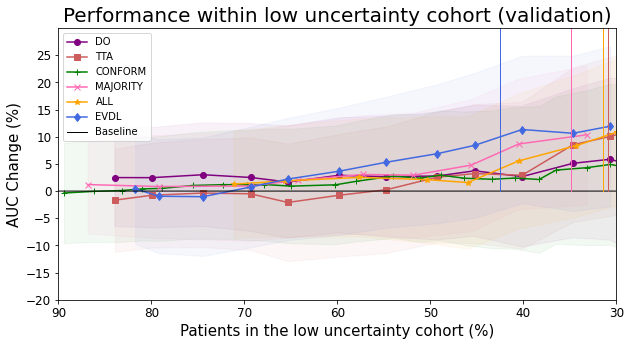

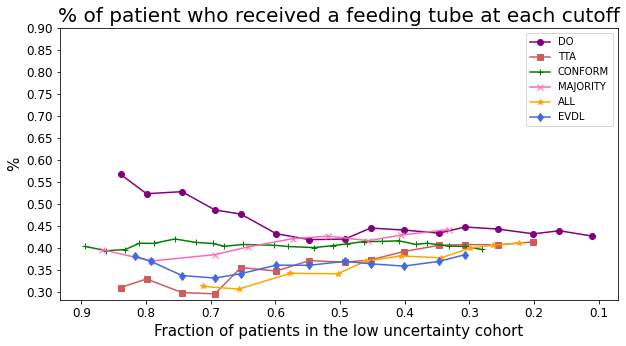

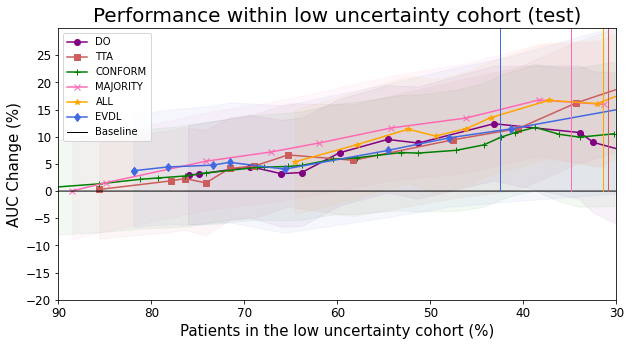

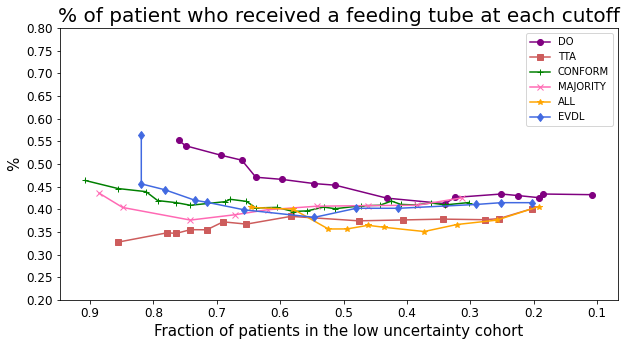

In [2]:
load_dir = r'C:\Users\s185479\Desktop\Python_Code\Projects\Feeding_Tube\uncertainty\uncertainty_update_20220801\save_folder'
load_ratio_dir = r'C:\Users\s185479\Desktop\Python_Code\Projects\Feeding_Tube\uncertainty\uncertainty_update_20220801\ratio'

print_ = True

legend_line_color = [('all', 'orange', '*'), ('conform', 'green', '+'), ('epi', 'purple', 'o'), 
                     ('tta', 'indianred', 's'), ('evdl', 'royalblue', 'd'), ('majority', 'hotpink', 'x')]

legend = []
reorder = [('epi', 0), ('tta', 1), ('conform', 2), ('majority', 3), ('all', 4), ('evdl', 5)]

print(sorted([x for x in os.listdir(load_dir) if 'csv' in x]))

reorder_list = []

val_cuts = []
val_cuts_total = []
test_cuts_total = []

for x, _ in reorder:
    reorder_list.extend([y for y in os.listdir(load_dir) if x in y])
# print(reorder_list)


plt.figure(figsize=(10,5))
for i, file in enumerate(reorder_list):
#     print(file)
    if 'val' in file and 'csv' in file and 'wrong' not in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        
#         print(np.array(ast.literal_eval(df['num'].tolist()[0]))/274*100)
        

        if 'epi' not in file:
            name_ = file.split('.')[0].split('_')[1].upper()
        else:
             name_ = 'DO'

        val_cuts_total.append((np.array(ast.literal_eval(df['num'].tolist()[0]))/274*100, name_))
        
        y1 = df['l_auc'].tolist()[0]
        y1 = ast.literal_eval(y1)
        y2 = df['total_auc'].tolist()[0]
        y2 = ast.literal_eval(y2)

        y1_minus = ast.literal_eval(df['l_auc_low_conf'].tolist()[0])
        y1_plus = ast.literal_eval(df['l_auc_high_conf'].tolist()[0])
        
        y1 = list((np.array(y1) - np.array(y2))/ np.array(y2)*100)
        
        y1_minus = list((np.array(y1_minus) - np.array(y2))/ np.array(y2)*100)
        y1_plus = list((np.array(y1_plus) - np.array(y2))/ np.array(y2)*100)
        
#         print(df.head())
        
        if 'evdl' in file:
            save_x = x
            save_x = [x/274 for x in x]
            save_y = y2
        else:
            save_later_x = x
            save_later_x = [x/274 for x in x]
            save_later_y = y2

        x = [x/274*100 for x in x]
        
        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)
        
        if all(i >= -2 for i in y1_minus[-1::-3]) and all(i >= -2 for i in y1_plus[-1::-3]):
            plt.fill_between(x, (y1_minus), (y1_plus), color=color, alpha=0.05)
        else:
            plt.fill_between(x, (y1_minus), (y1_plus), color=color, alpha=0.05)
        
        plt.yticks(np.arange(-20, 30, 5), fontsize=12)
        plt.xticks(fontsize=12)
        
        x_cut, y_value = clinic_sign(x, y1, 10)
        
        if not pd.isna(x_cut):
            if 'epi' not in file:
                name_ = file.split('.')[0].split('_')[1].upper()
            else:
                 name_ = 'DO'
            val_cuts.append((x_cut, name_))
        else:
            pass
        
        

        plt.ylim([-20, 30])
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')

print(val_cuts)
print(np.shape(val_cuts_total))
print(val_cuts_total[2])
x = list(np.arange(0, 100, 0.01))
plt.plot(x, [0 for xx in x], linewidth=1, color='black')
legend.extend(['Baseline'])

for ii, jj in val_cuts:
    print(legend_line_color, jj)
    color = [x[1] for x in legend_line_color if x[0] in jj.lower()][0]
    plt.plot([ii for xx in np.arange(0, 100, 1)], np.arange(0, 100, 1), linewidth=1, color=color)

plt.title('Performance within low uncertainty cohort (validation)', fontsize=20)
plt.ylabel('AUC Change (%)', fontsize=15)
plt.xlabel('Patients in the low uncertainty cohort (%)', fontsize=15)
plt.yticks(np.arange(-20, 30, 5), fontsize=12)
plt.legend(legend)
plt.ylim([-20, 30])
plt.xlim([30, 90])
plt.gca().invert_xaxis()

# plt.gca().twinx()
# plt.gca().set_ylabel('stupid')

if not print_:
    plt.show()
else:
    plt.savefig('1a val low - rescale-percent.png', dpi=300)
    
    
####
# ratios 
plt.figure(figsize=(10,5))
for i, file in enumerate(reorder_list):
#     print(file)
    if 'val' in file and 'csv' in file and 'wrong' not in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = np.load(os.path.join(load_ratio_dir, file.replace('.csv', '.npy')))
        print(f"{file}: {np.mean(y1)} +/- {np.std(y1)}")

        x = [x/274 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)
        plt.yticks(np.arange(0.3, 0.9, 0.05), fontsize=12)
        plt.xticks(fontsize=12)
#         plt.ylim([0.6, 0.9])
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')

plt.title('% of patient who received a feeding tube at each cutoff', fontsize=20)
plt.ylabel('%', fontsize=15)
plt.xlabel('Fraction of patients in the low uncertainty cohort', fontsize=15)
plt.legend(legend)
plt.gca().invert_xaxis()



####

legend = []
plt.figure(figsize=(10,5))
for i, file in enumerate(reorder_list):
#     print(file)
    if 'test' in file and 'csv' in file and 'wrong' not in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = df['l_auc'].tolist()[0]
        y1 = ast.literal_eval(y1)
        y2 = df['total_auc'].tolist()[0]
        y2 = ast.literal_eval(y2)
        
        if 'epi' not in file:
            name_ = file.split('.')[0].split('_')[1].upper()
        else:
             name_ = 'DO'
        
        test_cuts_total.append((np.array(ast.literal_eval(df['num'].tolist()[0]))/271*100, name_))
        
        y1_minus = ast.literal_eval(df['l_auc_low_conf'].tolist()[0])
        y1_plus = ast.literal_eval(df['l_auc_high_conf'].tolist()[0])
        
        y1 = list((np.array(y1) - np.array(y2))/ np.array(y2)*100)
        
        y1_minus = list((np.array(y1_minus) - np.array(y2))/ np.array(y2)*100)
        y1_plus = list((np.array(y1_plus) - np.array(y2))/ np.array(y2)*100)

        
        if 'evdl' in file:
            save_x = x
            save_y = y2
        else:
            save_later_x = x
            save_later_y = y2

        x = [x/271*100 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)
        
        if 'conf' in file.lower():
            plt.fill_between(x, (y1_minus), (y1_plus), color=color, alpha=0.05)
        else:
            plt.fill_between(x, (y1_minus), (y1_plus), color=color, alpha=0.05)
            
        plt.xticks(fontsize=12)
        plt.yticks(np.arange(-20, 30, 5), fontsize=12)
        plt.ylim([-20, 30])
        
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')

print(test_cuts_total[1])
x = list(np.arange(0, 100, 0.01))
plt.plot(x, [0 for xx in x], linewidth=1, color='black')
legend.extend(['Baseline'])

for ii, jj in val_cuts:
    a = [x[0] for x in test_cuts_total if x[1].lower() in jj.lower()][0]
    index = np.argmin(np.abs(np.array(a)-ii))
    print(ii, a[index]) 
    
    color = [x[1] for x in legend_line_color if x[0] in jj.lower()][0]
    plt.plot([ii for xx in np.arange(0, 100, 1)], np.arange(0, 100, 1), linewidth=1, color=color)


plt.title('Performance within low uncertainty cohort (test)', fontsize=20)
plt.ylabel('AUC Change (%)', fontsize=15)
plt.xlabel('Patients in the low uncertainty cohort (%)', fontsize=15)
plt.legend(legend)
plt.yticks(np.arange(-20, 30, 5), fontsize=12)
plt.xlim([30, 90])
plt.ylim([-20, 30])
plt.gca().invert_xaxis()
if not print_:
    plt.show()
else:
    plt.savefig('1b test low - rescale-ratio.png', dpi=300)
    
    
###Ratio
# ratios 
plt.figure(figsize=(10,5))
for i, file in enumerate(reorder_list):
#     print(file)
    if 'test' in file and 'csv' in file and 'wrong' not in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = np.load(os.path.join(load_ratio_dir, file.replace('.csv', '.npy')))
        print(f"{file}: {np.mean(y1)} +/- {np.std(y1)}")

        x = [x/271 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)
        plt.yticks(np.arange(0.2, 0.8, 0.05), fontsize=12)
        plt.xticks(fontsize=12)
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')

plt.title('% of patient who received a feeding tube at each cutoff', fontsize=20)
plt.ylabel('%', fontsize=15)
plt.xlabel('Fraction of patients in the low uncertainty cohort', fontsize=15)
plt.legend(legend)
plt.gca().invert_xaxis()

####

import pickle
val_name_save= r'C:\Users\s185479\Desktop\Python_Code\Projects\Feeding_Tube\uncertainty\uncertainty_update_20220801\store_etc\selected_cutpoints\val_cuts.pkl'
valtotal_name_save= r'C:\Users\s185479\Desktop\Python_Code\Projects\Feeding_Tube\uncertainty\uncertainty_update_20220801\store_etc\selected_cutpoints\val_cuts_total.pkl'

# test_name_save=r'C:\Users\s185479\Desktop\Python_Code\Projects\Feeding_Tube\uncertainty\uncertainty_update_20220801\store_etc\selected_cutpoints\test_cuts.pkl'
testtotal_name_save=r'C:\Users\s185479\Desktop\Python_Code\Projects\Feeding_Tube\uncertainty\uncertainty_update_20220801\store_etc\selected_cutpoints\test_cuts_total.pkl'

with open(val_name_save, 'wb') as f:
    pickle.dump(val_cuts, f)
    
with open(valtotal_name_save, 'wb') as f:
    pickle.dump(val_cuts_total, f)
    
    
with open(testtotal_name_save, 'wb') as f:
    pickle.dump(test_cuts_total, f)


[('all', 'orange', '*'), ('conform', 'green', '+'), ('epi', 'purple', 'o'), ('tta', 'indianred', 's'), ('evdl', 'royalblue', 'd'), ('majority', 'hotpink', 'x')] TTA
[('all', 'orange', '*'), ('conform', 'green', '+'), ('epi', 'purple', 'o'), ('tta', 'indianred', 's'), ('evdl', 'royalblue', 'd'), ('majority', 'hotpink', 'x')] MAJORITY
[('all', 'orange', '*'), ('conform', 'green', '+'), ('epi', 'purple', 'o'), ('tta', 'indianred', 's'), ('evdl', 'royalblue', 'd'), ('majority', 'hotpink', 'x')] ALL
[('all', 'orange', '*'), ('conform', 'green', '+'), ('epi', 'purple', 'o'), ('tta', 'indianred', 's'), ('evdl', 'royalblue', 'd'), ('majority', 'hotpink', 'x')] EVDL
val_epi_wrong.csv: 0.3928821553213557 +/- 0.018798160818138124
val_tta_wrong.csv: 0.4681777175794238 +/- 0.013645656215208527
val_conform_wrong.csv: 0.45126700909495393 +/- 0.04361632092327627
val_majority_wrong.csv: 0.41044676564399757 +/- 0.05091081202800127
val_all_wrong.csv: 0.4533384450339691 +/- 0.006247811546844778
val_evdl_w

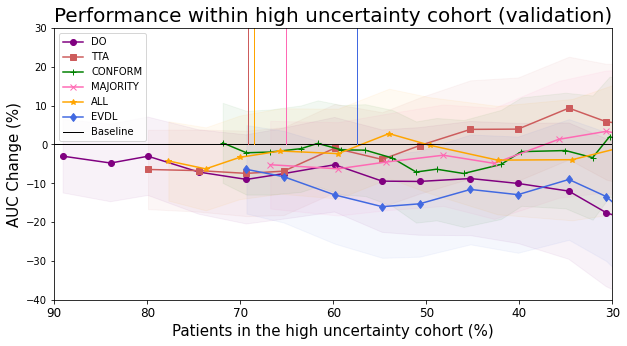

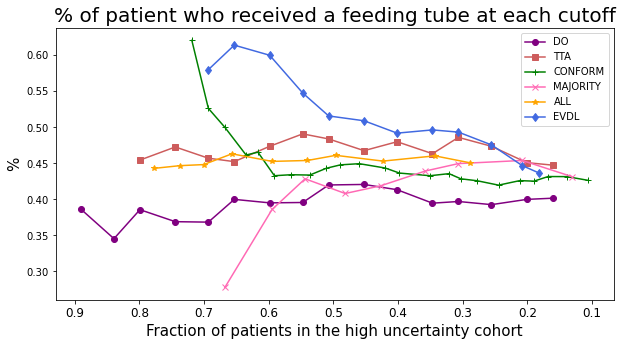

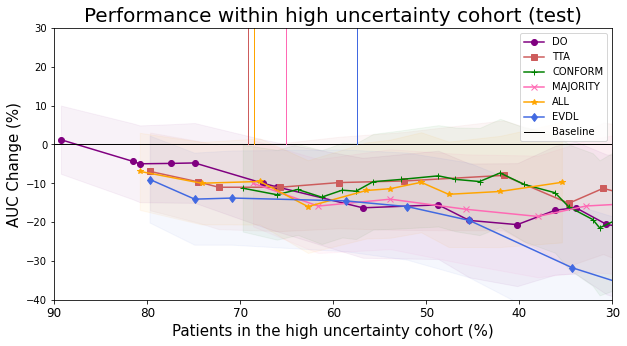

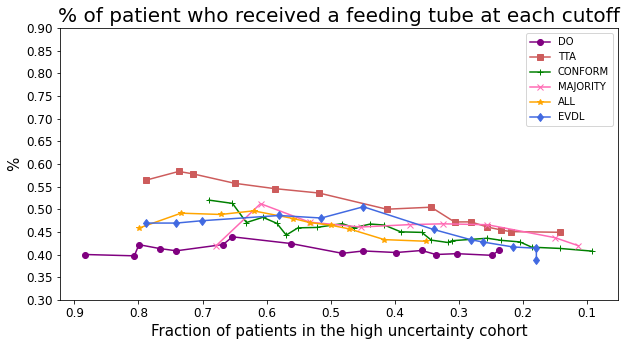

In [5]:
load_dir = r'C:\Users\s185479\Desktop\Python_Code\Projects\Feeding_Tube\uncertainty\uncertainty_update_20220801\save_folder'

legend = []
plt.figure(figsize=(10,5))
for i, file in enumerate(reorder_list):
#     print(file)
    if 'val' in file and 'csv' in file and 'wrong' in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = df['h_auc'].tolist()[0]
        y1 = ast.literal_eval(y1)
        y2 = df['total_auc'].tolist()[0]
        y2 = ast.literal_eval(y2)
        
#         y1 = list((np.array(y1) - np.array(y2))/ np.array(y2)*100)
        
        y1_minus = ast.literal_eval(df['h_auc_low_conf'].tolist()[0])
        y1_plus = ast.literal_eval(df['h_auc_high_conf'].tolist()[0])
        
        y1 = list((np.array(y1) - np.array(y2))/ np.array(y2)*100)
        
        y1_minus = list((np.array(y1_minus) - np.array(y2))/ np.array(y2)*100)
        y1_plus = list((np.array(y1_plus) - np.array(y2))/ np.array(y2)*100)
        
        if 'evdl' in file:
            save_x = x
            save_x = [x/274 for x in x]
            save_y = y2
        else:
            save_later_x = x
            save_later_x = [x/274 for x in x]
            save_later_y = y2

        x = [x/274*100 for x in x]
        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)

        if all(i >= -2 for i in y1_minus[-1::-3]) and all(i >= -2 for i in y1_plus[-1::-3]):
            plt.fill_between(x, (y1_minus), (y1_plus), color=color, alpha=0.05)
        else:
            plt.fill_between(x, (y1_minus), (y1_plus), color=color, alpha=0.05)
        
        plt.xticks(fontsize=12)
#         plt.xlim([0.25, 0.9])
        plt.ylim([-40, 30])
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')

x = list(np.arange(0, 100, 0.01))
plt.plot(x, [0 for xx in x], linewidth=1, color='black')
legend.extend(['Baseline'])

for ii, jj in val_cuts:
    print(legend_line_color, jj)
    color = [x[1] for x in legend_line_color if x[0] in jj.lower()][0]
    plt.plot([100-ii for xx in np.arange(0, 100, 1)], np.arange(0, 100, 1), linewidth=1, color=color)

plt.title('Performance within high uncertainty cohort (validation)', fontsize=20)
plt.xlim([30, 90])
plt.ylim([-40, 30])
plt.gca().invert_xaxis()
plt.ylabel('AUC Change (%)', fontsize=15)
plt.xlabel('Patients in the high uncertainty cohort (%)', fontsize=15)
plt.legend(legend)
if not print_:
    plt.show()
else:
    plt.savefig('1c val high - baseline_ratio.png', dpi=300)
    
    
####
# ratios 
plt.figure(figsize=(10,5))
for i, file in enumerate(reorder_list):
#     print(file)
    if 'val' in file and 'csv' in file and 'wrong' in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = np.load(os.path.join(load_ratio_dir, file.replace('.csv', '.npy')))
        print(f"{file}: {np.mean(y1)} +/- {np.std(y1)}")

        x = [x/274 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)
#         plt.yticks(np.arange(0.2, 0.8, 0.05), fontsize=12)
        plt.xticks(fontsize=12)
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')

plt.title('% of patient who received a feeding tube at each cutoff', fontsize=20)
plt.ylabel('%', fontsize=15)
plt.xlabel('Fraction of patients in the high uncertainty cohort', fontsize=15)
plt.legend(legend)
plt.gca().invert_xaxis()

####

legend = []
plt.figure(figsize=(10,5))
for i, file in enumerate(reorder_list):
#     print(file)
    if 'test' in file and 'csv' in file and 'wrong' in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = df['h_auc'].tolist()[0]
        y1 = ast.literal_eval(y1)
        y2 = df['total_auc'].tolist()[0]
        y2 = ast.literal_eval(y2)
        
#         y1 = list((np.array(y1) - np.array(y2))/ np.array(y2)*100)
#         print((df['h_auc_low_conf'].tolist()[0]).replace('nan', '0.0'))
        y1_minus = ast.literal_eval(df['h_auc_low_conf'].tolist()[0].replace('nan', '0.0'))
        y1_plus = ast.literal_eval(df['h_auc_high_conf'].tolist()[0].replace('nan', '0.0'))
        
        y1 = list((np.array(y1) - np.array(y2))/ np.array(y2)*100)
        
        y1_minus = list((np.array(y1_minus) - np.array(y2))/ np.array(y2)*100)
        y1_plus = list((np.array(y1_plus) - np.array(y2))/ np.array(y2)*100)
        
        if 'evdl' in file:
            save_x = x
            save_x = [x/271 for x in x]
            save_y = y2
        else:
            save_later_x = x
            save_later_x = [x/271 for x in x]
            save_later_y = y2

        x = [x/271*100 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)
        
        if 'conf' in file.lower():
            plt.fill_between(x, (y1_minus), (y1_plus), color=color, alpha=0.05)
        else:
            plt.fill_between(x, (y1_minus), (y1_plus), color=color, alpha=0.05)
            
        plt.xticks(fontsize=12)
#         plt.yticks(np.arange(-40, 30, 10), fontsize=12)
#         plt.ylim([-40, 30])
        plt.xticks(fontsize=12)
#         plt.xlim([0.3, 0.9])
        plt.ylim([-40, 30])
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')
            
            
x = list(np.arange(0, 100, 0.01))
plt.plot(x, [0 for xx in x], linewidth=1, color='black')
legend.extend(['Baseline'])

for ii, jj in val_cuts:
    a = [x[0] for x in test_cuts_total if x[1].lower() in jj.lower()][0]
    index = np.argmin(np.abs(np.array(a)-ii))
    print(ii, a[index]) 
    
    color = [x[1] for x in legend_line_color if x[0] in jj.lower()][0]
    plt.plot([100-ii for xx in np.arange(0, 100, 1)], np.arange(0, 100, 1), linewidth=1, color=color)

plt.title('Performance within high uncertainty cohort (test)', fontsize=20)
plt.xlim([30, 90])
plt.ylim([-40, 30])
plt.gca().invert_xaxis()
plt.ylabel('AUC Change (%)', fontsize=15)
plt.xlabel('Patients in the high uncertainty cohort (%)', fontsize=15)
plt.legend(legend)
if not print_:
    plt.show()
else:
    plt.savefig('1d test high - baseline_ratio.png', dpi=300)
    
    
####
# ratios 
plt.figure(figsize=(10,5))
for i, file in enumerate(reorder_list):
#     print(file)
    if 'test' in file and 'csv' in file and 'wrong' in file:
        df = pd.read_csv(os.path.join(load_dir, file))
        x = df['num'].tolist()[0]
        x = ast.literal_eval(x)
        y1 = np.load(os.path.join(load_ratio_dir, file.replace('.csv', '.npy')))
        print(f"{file}: {np.mean(y1)} +/- {np.std(y1)}")

        x = [x/274 for x in x]

        color = [x[1] for x in legend_line_color if x[0] in file][0]
        marker = [x[2] for x in legend_line_color if x[0] in file][0]
        plt.plot(x, y1, '-*', color=color, marker=marker)
        plt.yticks(np.arange(0.3, 0.9, 0.05), fontsize=12)
        plt.xticks(fontsize=12)
        if 'epi' not in file:
            legend.append(file.split('.')[0].split('_')[1].upper())
        else:
            legend.append('DO')

plt.title('% of patient who received a feeding tube at each cutoff', fontsize=20)
plt.ylabel('%', fontsize=15)
plt.xlabel('Fraction of patients in the high uncertainty cohort', fontsize=15)
plt.legend(legend)
plt.gca().invert_xaxis()

####